In [1]:
testTemp = [[]]

In [2]:
with open('training_new.txt', mode='r', encoding='utf-8') as f:
    for i in f.readlines():
        line = i.split()
        testTemp.append(line)

In [3]:
test = [[]]

In [4]:
for i in range(13):
    temp = []
    for j in range(15):
        temp.append(int(float(testTemp[i + 1][j + 1])))
    test.append(temp)
test.pop(0)

[]

In [5]:
files = []

In [6]:
for i in range(1, 1096):   
    with open('PA1-data/' + str(i) + '.txt', mode='r', encoding='utf-8') as f:
        file = [f.read()]
        files += file

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

In [8]:
x_total = np.empty([0])

In [9]:
processTrain = MultiLabelBinarizer()
x_total = processTrain.fit_transform(files)

In [10]:
x_train = np.empty([195, 85])
x_test = np.empty([900, 85])
testLabel = []

In [11]:
countTest = 0
for k in range(1, len(x_total) + 1):
    check = 0
    for i in range(13):
        for j in range(15):
            if k == test[i][j]:
                x_train[i * 15 + j] = x_total[k - 1]
                check = 1
                break
    if check == 0:
        x_test[countTest] = x_total[k - 1]
        countTest += 1
        testLabel.append(k)

In [12]:
from sklearn. naive_bayes import BernoulliNB

In [13]:
y_train = []
for i in range(13):
    for k in range(15):
        y_train.append(i + 1)

In [14]:
train = BernoulliNB()

In [15]:
train.fit(x_train, y_train)

BernoulliNB()

In [16]:
predicted_results = []

In [17]:
predicted_results.extend(train.predict(x_test))
predicted_results

[2,
 13,
 8,
 8,
 8,
 10,
 13,
 9,
 8,
 2,
 8,
 10,
 8,
 5,
 13,
 13,
 8,
 8,
 5,
 2,
 2,
 2,
 13,
 8,
 8,
 8,
 2,
 13,
 13,
 13,
 13,
 8,
 8,
 13,
 13,
 13,
 13,
 1,
 6,
 8,
 6,
 13,
 10,
 13,
 10,
 13,
 12,
 13,
 13,
 13,
 12,
 6,
 6,
 8,
 13,
 8,
 13,
 2,
 2,
 13,
 2,
 4,
 8,
 3,
 13,
 13,
 8,
 10,
 13,
 13,
 2,
 13,
 8,
 13,
 13,
 5,
 1,
 13,
 2,
 5,
 8,
 13,
 10,
 13,
 6,
 8,
 13,
 2,
 5,
 5,
 5,
 8,
 8,
 5,
 6,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 8,
 8,
 9,
 8,
 6,
 6,
 9,
 10,
 13,
 10,
 13,
 13,
 10,
 13,
 13,
 13,
 13,
 13,
 13,
 10,
 13,
 2,
 13,
 13,
 9,
 13,
 13,
 13,
 9,
 13,
 1,
 6,
 8,
 9,
 2,
 8,
 13,
 13,
 13,
 5,
 13,
 13,
 13,
 13,
 13,
 13,
 8,
 1,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 8,
 8,
 8,
 13,
 4,
 4,
 2,
 13,
 13,
 13,
 1,
 8,
 6,
 13,
 5,
 13,
 1,
 6,
 1,
 13,
 2,
 8,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 1,
 8,
 13,
 6,
 8,
 2,
 9,
 5,
 3,
 13,
 1,
 13,
 1,
 8,
 13,
 13,
 4,
 13,
 4,
 8,
 9,
 8,
 2,
 8,
 8,
 2,
 13,
 13,
 5,
 13,
 1,
 1,
 9,
 9,
 13

In [18]:
import csv

In [19]:
with open('hw2_b09704078.csv', mode='w', encoding='utf-8') as outcome:
    writer = csv.writer(outcome)
    writer.writerow(["Id","Value"])
    for i in range(len(testLabel)):
        writer.writerow([testLabel[i], predicted_results[i]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=3, stratify = y_train)

In [21]:
from sklearn.metrics import PrecisionRecallDisplay

In [22]:
predicted_result = []
expected_result = []

In [23]:
predicted_result = train.predict(X_test)
predicted_result

array([13, 12,  9,  1,  5, 12, 13,  5,  6,  8,  8,  8,  8, 13,  8,  5, 13,
        1,  1, 13])

In [24]:
expected_result = Y_test
expected_result

[3, 12, 9, 7, 2, 9, 12, 10, 6, 8, 13, 8, 11, 4, 10, 5, 4, 1, 1, 11]

In [25]:
from sklearn.metrics import precision_score
precision = precision_score(predicted_result, expected_result, average='micro')

In [26]:
from sklearn import metrics
print(metrics.classification_report(expected_result, predicted_result))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       0.40      1.00      0.57         2
           9       1.00      0.50      0.67         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.50      0.50      0.50         2
          13       0.00      0.00      0.00         1

    accuracy                           0.40        20
   macro avg       0.30      0.38      0.31        20
weighted avg       0.32      0.40      0.33        20



/Users/hsuchenchien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hsuchenchien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hsuchenchien/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [27]:
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y = label_binarize(expected_result, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
n_classes = Y.shape[1]

In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

classifier = OneVsRestClassifier(make_pipeline(StandardScaler(), LinearSVC()))
classifier.fit(X_test, Y_test)
y_score = classifier.decision_function(X_test)

In [37]:
y_score = np.array(y_score)

In [38]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y[:, i], y_score[:, i])

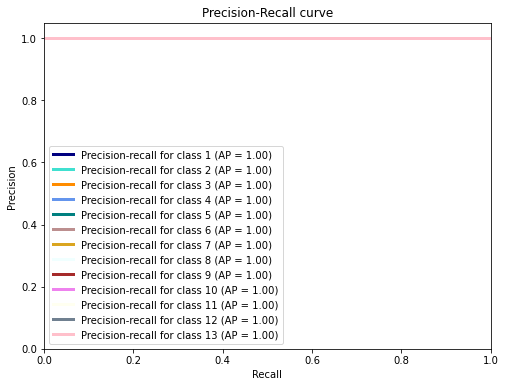

In [31]:
import matplotlib.pyplot as plt
from itertools import cycle

# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "rosybrown", "goldenrod", "azure", "brown", "violet", "ivory", "slategray", "pink"])

_, ax = plt.subplots(figsize=(8, 6))

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(recall=recall[i],precision=precision[i],average_precision=average_precision[i])
    display.plot(ax=ax, name=f"Precision-recall for class {i + 1}", color=color, linewidth=3)

handles, labels = display.ax_.get_legend_handles_labels()
ax.axis([0.0, 1.0, 0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision-Recall curve")

plt.show()